## Task-1 : prodigy_ml_01
# House price prediction

To Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.


Dataset:
    https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=test.csv
    

#### Importing libraries

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

### dataset loading

In [42]:
data = pd.read_csv("train.csv")

In [44]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### fill missing values with 0

In [4]:
data.fillna(0, inplace=True)

In [45]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
X= data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y= data['SalePrice']

### splitting the dataset

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train

,GrLivArea,BedroomAbvGr,FullBath
254,1314,3,1
1066,1571,3,2
638,796,2,1
799,1768,3,1
380,1691,3,2
...,...,...,...
1095,1314,3,2
1130,1981,4,2
1294,864,2,1
860,1426,3,1


In [62]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

### Model training

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model prediction

In [88]:
y_pred = model.predict(X_test)

### Errors

In [89]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared (R2):", r_squared)

Mean Squared Error (MSE): 2806426667.247853
Mean Absolute Error (MAE): 35788.0612924363
R-squared (R2): 0.6341189942328371


### plot

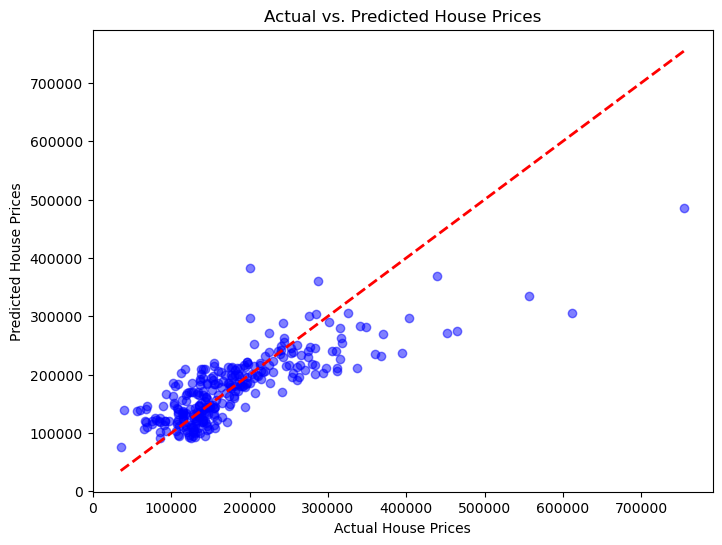

In [90]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()